In [1]:
import os, sys, torch
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
sys.path.append(os.path.abspath('../../modules'))
sys.path.append(os.path.abspath('../../modules/mnist'))

from vae import VAE
import vae_train as vt
import datapipe as dp
import batch as bt
import utility as ut
import cluster as cu
import classifier as cl


device = ut.get_device()
root = '../../data/MNIST/MNIST-Experiments'
mnist_folder = '../../data/MNIST'
ident = cl.get_classifier('../../data/MNIST/classifiers/MNISTClassifier.pth', 'mps')

In [2]:
dataloader = dp.MNIST().get_dataloader(10000)
img, digit = next(iter(dataloader))
path0 = f'{mnist_folder}/vae/vae_200.pth'
path1 = f'{root}/vae-o/expr-9/checkpoints/vae_epoch_1.pth'
n_clusters = 100
colors = cu.generate_continuous_colors(n_clusters)
colors10 = cu.generate_continuous_colors(10, 'inferno')
noise = torch.randn(10000, 2).to(device)
torch.manual_seed(42)

model0 = vt.init_model(path0, 2, 'mps')
# features0 = cu.extract_latent(model0, img)
features0, digit0 = cu.extract_recon_latent(model0, noise, ident)
labels0, centroids0 = cu.kmeans(features0, n_clusters, 100)
colors0 = colors[labels0]
cd0 = cu.cluster_dist(labels0, digit0)
colors0_ = colors10[np.argmax(cd0, axis=1)[labels0]]

model1 = vt.init_model(path1, 2, 'mps')
model1.to('mps')
# features1 = cu.extract_latent(model1, img)
features1, digit1 = cu.extract_recon_latent(model1, noise, ident)
labels1, centroids1 = cu.kmeans(features1, n_clusters, 100)
colors1 = colors[labels1.astype(int)]
cd1 = cu.cluster_dist(labels1, digit1)
colors1_ = colors10[np.argmax(cd1, axis=1)[labels1]]

/Users/pman0581/miniconda3/envs/metal/lib/python3.11/site-packages/torch/_utils.py:831: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  return self.fget.__get__(instance, owner)()


/var/folders/v9/pbbcbpgd4mj4sbplbm4ht36r0000gq/T/ipykernel_48800/3939397042.py:9: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  ax[1].scatter(-4, 3, c=colors10[i], label=f'{i}', s=100)


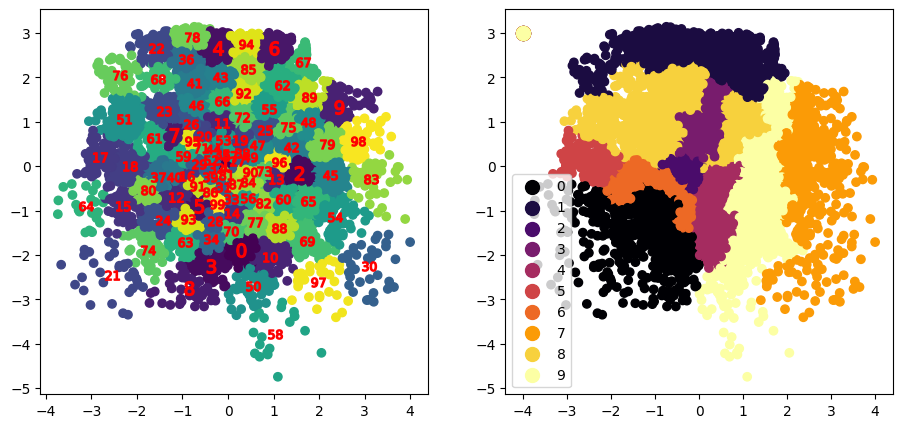

In [99]:
fig, ax = plt.subplots(1, 2, figsize=(11, 5))
f0 = features0
c0 = centroids0
ax[0].scatter(f0[:, 0], f0[:, 1], c=colors0)
ax[1].scatter(f0[:, 0], f0[:, 1], c=colors0_)
for i in range(len(c0)):
    ax[0].scatter(c0[i, 0], c0[i, 1], marker=fr'${i}$', s=100, c='red')
for i in range(10):
    ax[1].scatter(-4, 3, c=colors10[i], label=f'{i}', s=100)
ax[1].legend()

/var/folders/v9/pbbcbpgd4mj4sbplbm4ht36r0000gq/T/ipykernel_48800/1259636824.py:9: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  ax[1].scatter(0, 5, c=colors10[i], label=f'{i}', s=100)


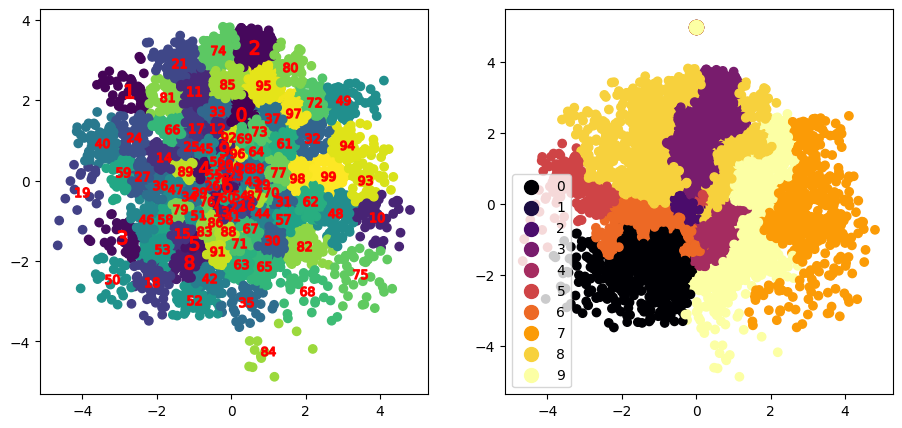

In [100]:
fig, ax = plt.subplots(1, 2, figsize=(11, 5))
f1 = features1
c1 = centroids1
ax[0].scatter(f1[:, 0], f1[:, 1], c=colors1)
ax[1].scatter(f1[:, 0], f1[:, 1], c=colors1_)
for i in range(len(c1)):
    ax[0].scatter(c1[i, 0], c1[i, 1], marker=fr'${i}$', s=100, c='red')
for i in range(10):
    ax[1].scatter(0, 5, c=colors10[i], label=f'{i}', s=100)
ax[1].legend()

/var/folders/v9/pbbcbpgd4mj4sbplbm4ht36r0000gq/T/ipykernel_48800/4261213007.py:7: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  ax[1].scatter(0, 5, c=colors10[i], label=f'{i}', s=100)


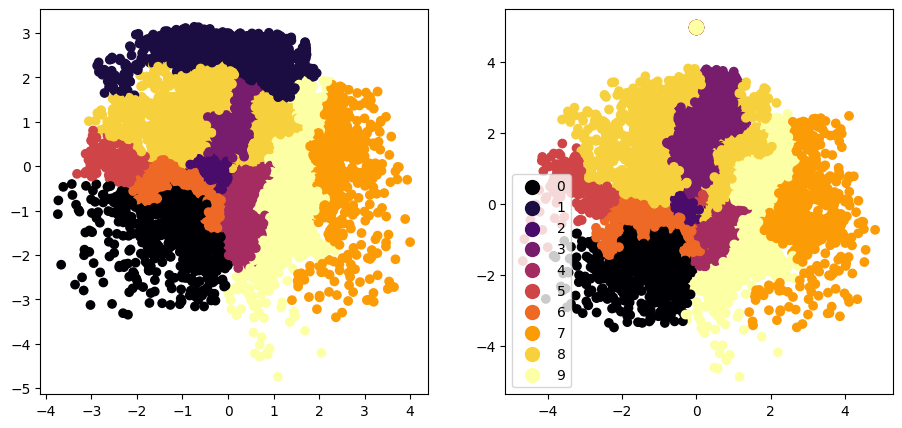

In [104]:
fig, ax = plt.subplots(1, 2, figsize=(11, 5))
ax[0].scatter(f0[:, 0], f0[:, 1], c=colors0_)
ax[1].scatter(f1[:, 0], f1[:, 1], c=colors1_)
# for i in range(len(c1)):
#     ax[0].scatter(c1[i, 0], c1[i, 1], marker=fr'${i}$', s=100, c='red')
for i in range(10):
    ax[1].scatter(0, 5, c=colors10[i], label=f'{i}', s=100)
ax[1].legend()

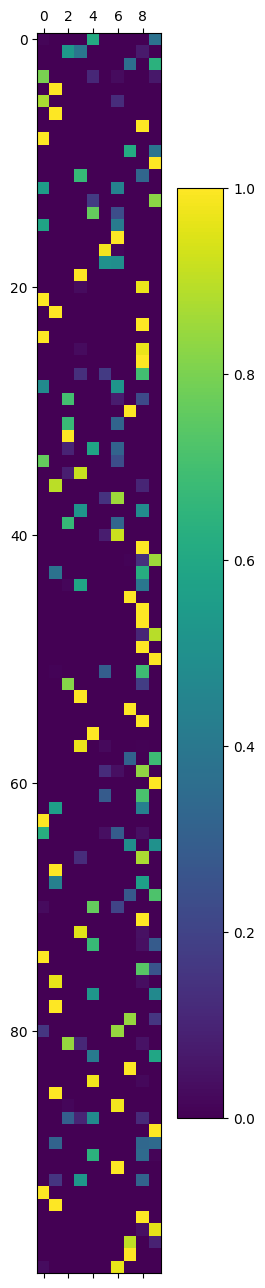

In [102]:
mat = plt.matshow(cd0)
plt.colorbar(mat)

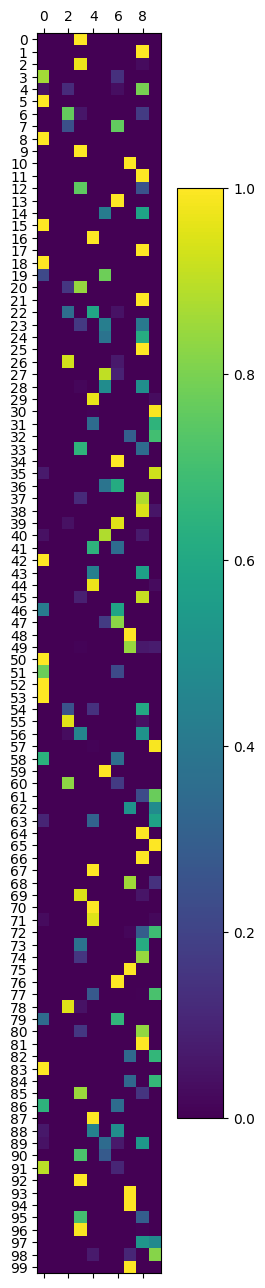

In [103]:
mat = plt.matshow(cd1)
plt.colorbar(mat)
# plt.xticks(ticks=[0, 1, 2, 3, 4, 5, 6, 7, 8], labels=[0, 2, 3, 4, 5, 6, 7, 8, 9])
plt.yticks(ticks=range(n_clusters), labels=range(n_clusters));

In [71]:
np.argmax(cd1, axis=1)

array([9, 8, 7, 0, 8, 9, 2, 6, 0, 8, 7, 8, 9, 4, 6, 0, 9, 3, 0, 5, 3, 3,
       4, 8, 5, 8, 2, 5, 4, 7])

In [82]:
cd0

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.5483871 , 0.        , 0.4516129 ],
       [0.        , 0.        , 0.210403  , 0.44095595, 0.        ,
        0.00796626, 0.00749766, 0.        , 0.33317713, 0.        ],
       [0.        , 0.        , 0.        , 0.03196622, 0.30036188,
        0.00120627, 0.        , 0.00723764, 0.38057901, 0.27864897],
       [0.09268293, 0.        , 0.        , 0.        , 0.28780488,
        0.        , 0.03902439, 0.02439024, 0.        , 0.55609756],
       [0.        , 0.55573248, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.44426752, 0.        ],
       [0.15389569, 0.        , 0.13972956, 0.0128783 , 0.1931745 ,
        0.        , 0.49710238, 0.        , 0.00321958, 0.        ],
       [0.        , 0.59843546, 0.        , 0.08996089, 0.        ,
        0.        , 0.        , 0.        , 0.31160365, 0.        ],
       [0.07433809, 0.        , 0.       

In [4]:
features0.shape

(10000, 2)